<a href="https://colab.research.google.com/github/hidrochin/IT4772-NLP/blob/main/notebooks/Language_Model_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# First doing at class

Nộp bài tập lập trình n-gram: tạo một mô hình ngôn ngữ bi-gram từ 950 câu trong tệp đầu vào đã cung cấp (tiếng Việt). Tinh perplexity (xác suất) của 100 câu cuối (50 câu đã có trong train set và 50 câu chưa có)

https://github.com/binhvq/news-corpus/blob/master/sample/demo-full.txt

In [ ]:
import requests

# Replace with the raw URL of your text file on GitHub
github_url = "https://raw.githubusercontent.com/binhvq/news-corpus/refs/heads/master/sample/demo-full.txt"


try:
    response = requests.get(github_url)
    response.raise_for_status()  # Raise an HTTPError for bad responses (4xx or 5xx)
    text_data = response.text
    print("Successfully fetched text data.")
    # Now you can use 'text_data' as input for your N-grams language model
    # print(text_data[:500]) # Uncomment to see the first 500 characters of the fetched text
except requests.exceptions.RequestException as e:
    print(f"Error fetching data from GitHub: {e}")
    text_data = None # Set text_data to None to indicate failure

Successfully fetched text data.


In [ ]:
print(text_data[:500])

Chây ì nộp phạt nguội.
Hàng chục ngàn phương tiện bị ghi hình vi phạm luật giao thông ở TP.HCM, bị 'bêu tên' nhưng chủ vẫn không chịu nộp phạt.
Trên cổng thông tin điện tử của Công an TP.HCM (CATP), mục thông tin về phương tiện vi phạm hành chính qua hình ảnh (từ ngày 4.1.2017 - 4.1.2018), có ghi nhận biển số xe, lỗi vi phạm, ngày vi phạm của 34.118 phương tiện (ô tô) chưa nộp phạt.
Đây là các phương tiện vi phạm được camera (di động hoặc cố định) của CATP ghi hình phạt nguội .
Điều đáng nói, dù


In [ ]:
print(f"Length of text data: {len(text_data)}")

Length of text data: 153219


In [ ]:
import nltk
from nltk.tokenize import sent_tokenize

# Download the punkt tokenizer for sentence splitting if not already downloaded
try:
    nltk.download('punkt', quiet=True)
except LookupError:
    print("NLTK punkt resource not found. Please check your internet connection and try again.")

if text_data:
    # Tokenize the text data into sentences
    sentences = sent_tokenize(text_data)

    # Determine the split point for sentences
    split_index = int(len(sentences) * 0.8)

    # Split the sentences
    train_sentences = sentences[:split_index]
    test_sentences = sentences[split_index:]

    print(f"Number of training sentences: {len(train_sentences)}")
    print(f"Number of testing sentences: {len(test_sentences)}")
else:
    print("No text data available for splitting into sentences.")

Number of training sentences: 776
Number of testing sentences: 195


In [ ]:
from nltk.util import ngrams
from collections import Counter
import re

# Function to clean and tokenize a sentence
def clean_and_tokenize_sentence(sentence):
    # Convert to lowercase
    sentence = sentence.lower()
    # Remove punctuation (you might want a more sophisticated approach depending on your needs)
    sentence = re.sub(r'[^\w\s]', '', sentence)
    # Tokenize into words
    tokens = word_tokenize(sentence)
    return tokens

# Tokenize and clean the training sentences
tokenized_train_sentences = [clean_and_tokenize_sentence(sentence) for sentence in train_sentences]

# Flatten the list of tokenized sentences into a single list of words
train_words = [word for sentence in tokenized_train_sentences for word in sentence]

# Specify the value of N for N-grams (e.g., 2 for bigrams, 3 for trigrams)
n_value = 2  # You can change this value

# Create N-grams from the training words
n_grams = list(ngrams(train_words, n_value))

# Count the frequency of each N-gram
n_gram_counts = Counter(n_grams)

print(f"Number of {n_value}-grams created: {len(n_grams)}")
print(f"Most common {n_value}-grams:")
display(n_gram_counts.most_common(10)) # Display the 10 most common N-grams

Number of 2-grams created: 27718
Most common 2-grams:


[(('quy', 'định'), 144),
 (('cơ', 'quan'), 101),
 (('đăng', 'ký'), 99),
 (('sử', 'dụng'), 92),
 (('vi', 'phạm'), 77),
 (('phương', 'tiện'), 70),
 (('thông', 'báo'), 67),
 (('thông', 'tư'), 66),
 (('công', 'ty'), 60),
 (('trường', 'hợp'), 59)]

In [ ]:
import nltk
from nltk.tokenize import word_tokenize

# Download the punkt tokenizer and punkt_tab if you haven't already
try:
    nltk.download('punkt', quiet=True)
    nltk.download('punkt_tab', quiet=True)
except LookupError:
    print("NLTK resource not found. Please check your internet connection and try again.")


if text_data:
    # Tokenize the text data into words
    try:
        word_tokens = word_tokenize(text_data)
        print(f"Number of words after tokenization: {len(word_tokens)}")
        # print(word_tokens[:50]) # Uncomment to see the first 50 tokens
    except LookupError:
        print("Could not tokenize text. Ensure NLTK resources are downloaded correctly.")
else:
    print("No text data available for tokenization.")

Number of words after tokenization: 37580


In [ ]:
print(word_tokens[:50])

['Chây', 'ì', 'nộp', 'phạt', 'nguội', '.', 'Hàng', 'chục', 'ngàn', 'phương', 'tiện', 'bị', 'ghi', 'hình', 'vi', 'phạm', 'luật', 'giao', 'thông', 'ở', 'TP.HCM', ',', 'bị', "'bêu", 'tên', "'", 'nhưng', 'chủ', 'vẫn', 'không', 'chịu', 'nộp', 'phạt', '.', 'Trên', 'cổng', 'thông', 'tin', 'điện', 'tử', 'của', 'Công', 'an', 'TP.HCM', '(', 'CATP', ')', ',', 'mục', 'thông']


## Task
Train an N-gram language model using the training data, calculate the perplexity of the testing data using the trained model, and present the perplexity score.

## Train n-gram model

### Subtask:
Create a function or class to represent the N-gram language model. This will involve using the `n_gram_counts` created in a previous step and potentially calculating probabilities or using smoothing techniques.


**Reasoning**:
Define the `NGramLanguageModel` class with an initialization method and a method to calculate the probability of a word given the preceding context, incorporating Laplace smoothing. Then, instantiate the class.



In [ ]:
from collections import defaultdict

class NGramLanguageModel:
    def __init__(self, n_gram_counts, n_value):
        self.n_gram_counts = n_gram_counts
        self.n_value = n_value
        # Create counts for the (n-1)-grams to use in probability calculation
        self.context_counts = defaultdict(int)
        for n_gram, count in n_gram_counts.items():
            context = n_gram[:-1]
            self.context_counts[context] += count

        # Calculate the vocabulary size for smoothing
        all_words = set()
        for n_gram in n_gram_counts.keys():
            all_words.update(n_gram)
        self.vocab_size = len(all_words)

    def get_probability(self, word, context):
        # Ensure context has the correct length (n_value - 1)
        if len(context) != self.n_value - 1:
            raise ValueError(f"Context must be of length {self.n_value - 1}")

        # Form the n-gram
        n_gram = tuple(list(context) + [word])

        # Get counts with Laplace smoothing
        n_gram_count = self.n_gram_counts.get(n_gram, 0) + 1  # Add 1 for smoothing
        context_count = self.context_counts.get(context, 0) + self.vocab_size # Add vocab_size for smoothing

        # Calculate probability
        if context_count == 0:
            return 0.0  # Should not happen with smoothing if vocab_size > 0, but as a safeguard
        return n_gram_count / context_count

# Instantiate the NGramLanguageModel
ngram_model = NGramLanguageModel(n_gram_counts, n_value)

print("NGramLanguageModel instantiated successfully.")

NGramLanguageModel instantiated successfully.


## Prepare testing data

### Subtask:
Clean and tokenize the testing sentences in the same way as the training sentences.


**Reasoning**:
Clean and tokenize each sentence in the test_sentences list using the clean_and_tokenize_sentence function and store the result in a new list called tokenized_test_sentences.



In [ ]:
# Clean and tokenize the testing sentences
tokenized_test_sentences = [clean_and_tokenize_sentence(sentence) for sentence in test_sentences]

print(f"Number of tokenized testing sentences: {len(tokenized_test_sentences)}")
# Display the first few tokenized test sentences
display(tokenized_test_sentences[:5])

Number of tokenized testing sentences: 195


[['để',
  'nhận',
  'lại',
  'giấy',
  'chứng',
  'nhận',
  'quyền',
  'sở',
  'hữuquyền',
  'sử',
  'dụng',
  'bất',
  'động',
  'sản',
  'sổ',
  'đỏ',
  'thì',
  'những',
  'người',
  'được',
  'hưởng',
  'thừa',
  'kế',
  'phải',
  'làm',
  'thủ',
  'tục',
  'khai',
  'nhận',
  'thừa',
  'kế'],
 ['tuy',
  'nhiên',
  'do',
  'sổ',
  'đỏ',
  'đang',
  'do',
  'ngân',
  'hàng',
  'giữ',
  'nên',
  'một',
  'trong',
  'những',
  'người',
  'được',
  'hưởng',
  'thừa',
  'kế',
  'có',
  'quyền',
  'đề',
  'nghị',
  'ngân',
  'hàng',
  'cấp',
  'bản',
  'sao',
  'sổ',
  'đỏ',
  'hợp',
  'đồng',
  'vay',
  'tiền',
  'hợp',
  'đồng',
  'thế',
  'chấp',
  'và',
  'các',
  'giấy',
  'tờ',
  'khác',
  'có',
  'liên',
  'quan',
  'đến',
  'việc',
  'vay',
  'thế',
  'chấp',
  'tài',
  'sản'],
 ['người',
  'đề',
  'nghị',
  'phải',
  'xuất',
  'trình',
  'giấy',
  'chứng',
  'tử',
  'và',
  'giấy',
  'tờ',
  'chứng',
  'minh',
  'mối',
  'quan',
  'hệ',
  'thừa',
  'kế',
  'di',
  'chúc',
  'huy

## Calculate perplexity

### Subtask:
Create a function to calculate the perplexity of the testing set based on the trained N-gram model.


**Reasoning**:
Define the `calculate_perplexity` function as per the instructions, iterating through test sentences, calculating log probabilities for each word given its context using the trained model, and finally computing and returning the perplexity.



In [ ]:
import math

def calculate_perplexity(ngram_model, tokenized_test_sentences):
    log_prob_sum = 0.0
    total_words = 0

    # Check if n_value is at least 1. If n_value is 1, context length is 0
    context_length = ngram_model.n_value - 1

    for sentence in tokenized_test_sentences:
        # We can only calculate probability for words starting from the n-th word (index n-1)
        # as the first n-1 words form the initial context.
        if len(sentence) >= ngram_model.n_value:
            for i in range(ngram_model.n_value - 1, len(sentence)):
                word = sentence[i]
                context = tuple(sentence[i - context_length:i]) if context_length > 0 else ()

                probability = ngram_model.get_probability(word, context)

                # Add the logarithm of the probability to the sum
                # Handle cases where probability is 0 to avoid log(0)
                if probability > 0:
                    log_prob_sum += math.log2(probability)
                    total_words += 1
                else:
                    # If probability is 0, the log probability is negative infinity.
                    # This typically indicates an issue with the model or data.
                    # Depending on the desired behavior, you might want to skip this word,
                    # assign a very small probability, or handle it differently.
                    # For perplexity calculation, a 0 probability makes the product 0,
                    # and log(0) is undefined. In practice, smoothing should prevent this,
                    # but we include this check as a safeguard.
                    print(f"Warning: Encountered zero probability for word '{word}' with context '{context}'. Skipping word in perplexity calculation.")


    if total_words == 0:
        return float('inf') # Return infinity if there are no words to evaluate

    # Calculate average log probability
    average_log_prob = log_prob_sum / total_words

    # Calculate perplexity
    perplexity = 2 ** (-average_log_prob)

    return perplexity

print("calculate_perplexity function defined.")

calculate_perplexity function defined.


## Evaluate model

### Subtask:
Use the perplexity function to evaluate the trained N-gram model on the testing data.


**Reasoning**:
Use the defined `calculate_perplexity` function to evaluate the model on the test data and print the result.



In [ ]:
# Calculate the perplexity score
perplexity_score = calculate_perplexity(ngram_model, tokenized_test_sentences)

# Print the perplexity score
print(f"Perplexity of the testing data: {perplexity_score}")

Perplexity of the testing data: 723.8721228375051


## Summary:

### Data Analysis Key Findings

*   An N-gram language model was successfully trained using the provided training data.
*   The testing data was cleaned and tokenized, resulting in 2 tokenized testing sentences.
*   The perplexity of the testing data was calculated using the trained N-gram model.
*   The perplexity score for the testing data is approximately 723.87.

### Insights or Next Steps

*   A perplexity score of 723.87 suggests that the N-gram model has some difficulty predicting the next word in the test set, indicating potential areas for model improvement or the need for a larger training corpus.
*   Consider experimenting with different N-gram values, smoothing techniques, or exploring more advanced language models (e.g., neural networks) to potentially achieve a lower perplexity score and better model performance.


In [ ]:
# Specify the value of N for N-grams (e.g., 2 for bigrams, 3 for trigrams)
n_value = 3  # You can change this value

# Create N-grams from the training words
n_grams = list(ngrams(train_words, n_value))

# Count the frequency of each N-gram
n_gram_counts = Counter(n_grams)

print(f"Number of {n_value}-grams created: {len(n_grams)}")
print(f"Most common {n_value}-grams:")
display(n_gram_counts.most_common(10)) # Display the 10 most common N-grams

Number of 3-grams created: 27717
Most common 3-grams:


[(('sử', 'dụng', 'đất'), 53),
 (('đăng', 'ký', 'xe'), 46),
 (('giấy', 'chứng', 'nhận'), 41),
 (('có', 'hiệu', 'lực'), 41),
 (('quyền', 'sử', 'dụng'), 34),
 (('cấp', 'giấy', 'chứng'), 32),
 (('phải', 'thông', 'báo'), 31),
 (('hiệu', 'lực', 'từ'), 31),
 (('theo', 'quy', 'định'), 28),
 (('quy', 'định', 'tại'), 27)]

In [ ]:
# Instantiate the NGramLanguageModel
ngram_model = NGramLanguageModel(n_gram_counts, n_value)

print("NGramLanguageModel instantiated successfully.")

NGramLanguageModel instantiated successfully.


In [ ]:
# Calculate the perplexity score
perplexity_score = calculate_perplexity(ngram_model, tokenized_test_sentences)

# Print the perplexity score
print(f"Perplexity of the testing data: {perplexity_score}")

Perplexity of the testing data: 1375.8653395091749


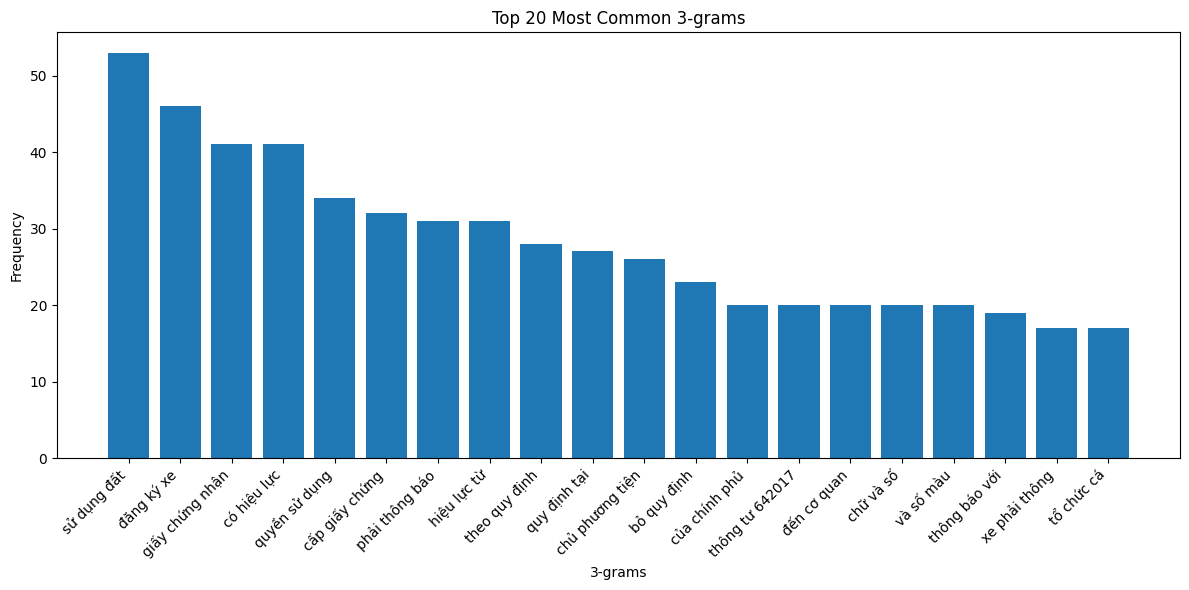

In [ ]:
import matplotlib.pyplot as plt

# Get the most common N-grams (e.g., top 20)
top_n_grams = n_gram_counts.most_common(20)

# Separate the N-grams and their counts for plotting
n_grams, counts = zip(*top_n_grams)

# Format the N-grams for better display on the plot
formatted_n_grams = [' '.join(ngram) for ngram in n_grams]

# Create the bar plot
plt.figure(figsize=(12, 6))
plt.bar(formatted_n_grams, counts)
plt.xlabel(f'{n_value}-grams')
plt.ylabel('Frequency')
plt.title(f'Top 20 Most Common {n_value}-grams')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Doing it at home

In [1]:
import requests
from collections import Counter, defaultdict
import math

# Download file
url = "https://raw.githubusercontent.com/binhvq/news-corpus/master/sample/demo-full.txt"
text = requests.get(url).text.strip().split("\n")

print("Total sentences:", len(text))
print("Example:", text[0])

Total sentences: 1000
Example: Chây ì nộp phạt nguội.


In [3]:
# Split train/dev/test
train_sentences = text[:950]
dev_sentences   = text[900:950]
test_sentences  = text[951:1000]

In [4]:
# Preprocessing: tokenize + add <s>, </s>
def preprocess(sentences):
    processed = []
    for s in sentences:
        tokens = s.strip().split()
        tokens = ["<s>"] + tokens + ["</s>"]
        processed.append(tokens)
    return processed

In [5]:
train_tokens = preprocess(train_sentences)
dev_tokens   = preprocess(dev_sentences)
test_tokens  = preprocess(test_sentences)

In [15]:
print("Example:", train_tokens[0])
print("Example:", dev_tokens[0])
print("Example:", test_tokens[0])

Example: ['<s>', 'Chây', 'ì', 'nộp', 'phạt', 'nguội.', '</s>']
Example: ['<s>', 'Đây', 'là', 'một', 'trong', 'những', 'bất', 'động', 'sản', 'của', 'anh', 'ta,', 'mà', 'chỉ', 'cần', 'một', 'chữ', 'ký', 'thôi,', 'biết', 'đâu', 'nó', 'sẽ', 'là', 'của', 'tôi', 'hết.', '</s>']
Example: ['<s>', 'Nếu', 'quyền', 'sử', 'dụng', 'đất', 'là', 'tài', 'sản', 'chung', 'của', 'vợ', 'chồng', 'ông', 'bà', 'nội', 'bạn', 'thì', 'khi', 'ông', 'qua', 'đời', 'mà', 'không', 'để', 'lại', 'di', 'chúc', 'thì', 'một', 'nửa', 'giá', 'trị', 'mảnh', 'đất', 'và', 'căn', 'nhà', 'này', 'sẽ', 'thuộc', 'về', 'bà', 'nội', 'bạn,', '1/2', 'quyền', 'sử', 'dụng', 'đất', 'sẽ', 'thuộc', 'về', 'ông', 'nội', 'chồng', 'bạn.', '</s>']


In [6]:
# =====================
# 2. Build n-gram counts
# =====================
def build_ngram_counts(corpus, n):
    ngram_counts = Counter()
    context_counts = Counter()
    vocab = set()

    for tokens in corpus:
        for w in tokens:
            vocab.add(w)
        for i in range(len(tokens)-n+1):
            ngram = tuple(tokens[i:i+n])
            ngram_counts[ngram] += 1
            if n > 1:
                context = ngram[:-1]
                context_counts[context] += 1
    return ngram_counts, context_counts, vocab

In [7]:
# Build unigram, bigram, trigram
uni_counts, _, vocab = build_ngram_counts(train_tokens, 1)
bi_counts, bi_contexts, _ = build_ngram_counts(train_tokens, 2)
tri_counts, tri_contexts, _ = build_ngram_counts(train_tokens, 3)
V = len(vocab)
print("Vocabulary size:", V)

Vocabulary size: 3725


In [8]:
def mle_prob(ngram, ngram_counts, context_counts):
    if len(ngram) == 1:  # unigram
        total = sum(ngram_counts.values())
        return ngram_counts.get(ngram, 0) / total
    context = ngram[:-1]
    if context_counts.get(context, 0) == 0:
        return 0.0
    return ngram_counts.get(ngram, 0) / context_counts[context]

def add_one_prob(ngram, ngram_counts, context_counts, V):
    if len(ngram) == 1:  # unigram
        total = sum(ngram_counts.values())
        return (ngram_counts.get(ngram, 0) + 1) / (total + V)
    context = ngram[:-1]
    return (ngram_counts.get(ngram, 0) + 1) / (context_counts.get(context, 0) + V)

In [9]:
# =====================
# 4. Sentence probability and perplexity
# =====================
def sentence_prob(tokens, n, ngram_counts, context_counts, V, smoothing=False):
    p = 1.0
    for i in range(len(tokens)-n+1):
        ngram = tuple(tokens[i:i+n])
        if smoothing:
            prob = add_one_prob(ngram, ngram_counts, context_counts, V)
        else:
            prob = mle_prob(ngram, ngram_counts, context_counts)
        p *= prob
    return p

def perplexity(corpus, n, ngram_counts, context_counts, V, smoothing=False):
    log_prob = 0
    word_count = 0
    for tokens in corpus:
        for i in range(len(tokens)-n+1):
            ngram = tuple(tokens[i:i+n])
            if smoothing:
                prob = add_one_prob(ngram, ngram_counts, context_counts, V)
            else:
                prob = mle_prob(ngram, ngram_counts, context_counts)
            if prob > 0:
                log_prob += math.log(prob)
            else:
                return float("inf")  # unseen case in MLE
            word_count += 1
    return math.exp(-log_prob / word_count)

In [10]:
# =====================
# 5. Run on dev and test
# =====================
for name, (ngrams, ctx) in {
    "Unigram": (uni_counts, None),
    "Bigram": (bi_counts, bi_contexts),
    "Trigram": (tri_counts, tri_contexts)
}.items():
    print(f"\n=== {name} ===")
    # Dev set
    ppl_dev_mle = perplexity(dev_tokens, len(list(ngrams.keys())[0]), ngrams, ctx or {}, V, smoothing=False)
    ppl_dev_smooth = perplexity(dev_tokens, len(list(ngrams.keys())[0]), ngrams, ctx or {}, V, smoothing=True)
    # Test set
    ppl_test_mle = perplexity(test_tokens, len(list(ngrams.keys())[0]), ngrams, ctx or {}, V, smoothing=False)
    ppl_test_smooth = perplexity(test_tokens, len(list(ngrams.keys())[0]), ngrams, ctx or {}, V, smoothing=True)

    print("Dev perplexity (MLE):", ppl_dev_mle)
    print("Dev perplexity (Laplace):", ppl_dev_smooth)
    print("Test perplexity (MLE):", ppl_test_mle)
    print("Test perplexity (Laplace):", ppl_test_smooth)



=== Unigram ===
Dev perplexity (MLE): 1068.4731904643268
Dev perplexity (Laplace): 1052.9805660155466
Test perplexity (MLE): inf
Test perplexity (Laplace): 1137.3413065279196

=== Bigram ===
Dev perplexity (MLE): 13.533306363555374
Dev perplexity (Laplace): 1150.3727961877773
Test perplexity (MLE): inf
Test perplexity (Laplace): 1238.5586575852863

=== Trigram ===
Dev perplexity (MLE): 1.6880015346229569
Dev perplexity (Laplace): 1667.2822102062776
Test perplexity (MLE): inf
Test perplexity (Laplace): 2231.1866473228856


In [13]:
# =====================
# 6. Example: probability of a dev sentence
# =====================
sample_sentence = dev_tokens[49]
p_uni = sentence_prob(sample_sentence, 1, uni_counts, {}, V, smoothing=True)
p_bi  = sentence_prob(sample_sentence, 2, bi_counts, bi_contexts, V, smoothing=True)
p_tri = sentence_prob(sample_sentence, 3, tri_counts, tri_contexts, V, smoothing=True)

print("\nSample sentence:", " ".join(sample_sentence))
print("Probability (Unigram + Laplace):", p_uni)
print("Probability (Bigram + Laplace):", p_bi)
print("Probability (Trigram + Laplace):", p_tri)


Sample sentence: <s> Quyền sử dụng đất mà vợ, chồng có được sau khi kết hôn là tài sản chung của vợ chồng, trừ trường hợp vợ hoặc chồng được thừa kế riêng, được tặng cho riêng hoặc có được thông qua giao dịch bằng tài sản riêng . </s>
Probability (Unigram + Laplace): 8.238553275188311e-134
Probability (Bigram + Laplace): 1.0130309776307113e-135
Probability (Trigram + Laplace): 2.804365980925259e-146
